#### 사이파이를 이용한 확률분포 분석

In [1]:
import scipy as sp
import scipy.stats

In [3]:
%matplotlib inline

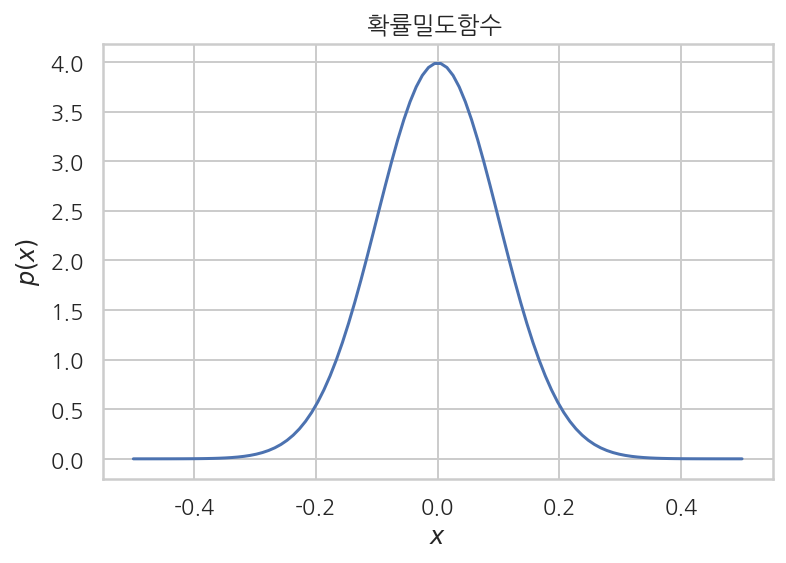

In [18]:
# 연습문제 8.1.1
rv = sp.stats.norm(loc=0, scale=0.1)

xx = np.linspace(-0.5, 0.5, 100)
pdf = rv.pdf(xx)
plt.figure(facecolor="1.")
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

표본평균:1.9547432925098047 비편향 표본분산:0.9742344563121544


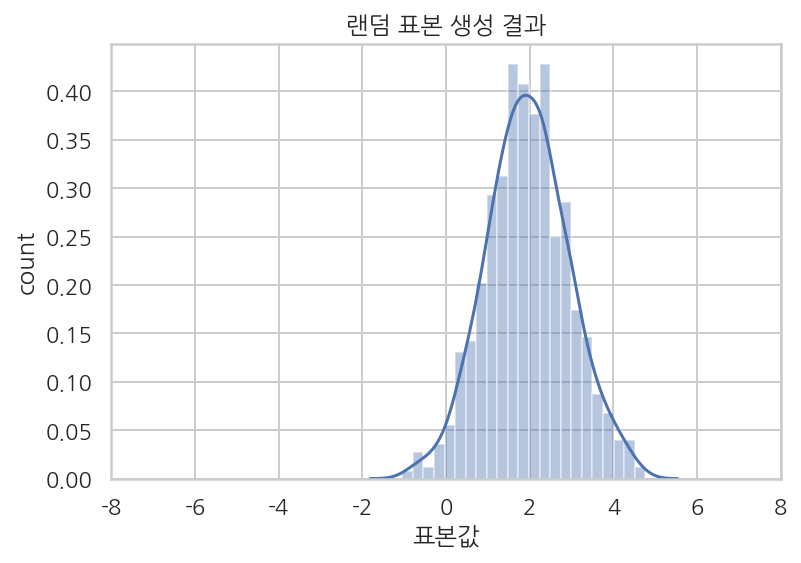

In [42]:
# 연습문제 8.1.2
rv2 = sp.stats.norm(loc=2, scale=1)
mean_rv2 = rv2.rvs(size=1000, random_state=0).mean()
var_rv2 = rv2.rvs(size=1000, random_state=0).var()
print("표본평균:{} 비편향 표본분산:{}".format(mean_rv2, var_rv2))
plt.figure(facecolor="1.")
sns.distplot(rv2.rvs(size=1000, random_state=0))
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.show()

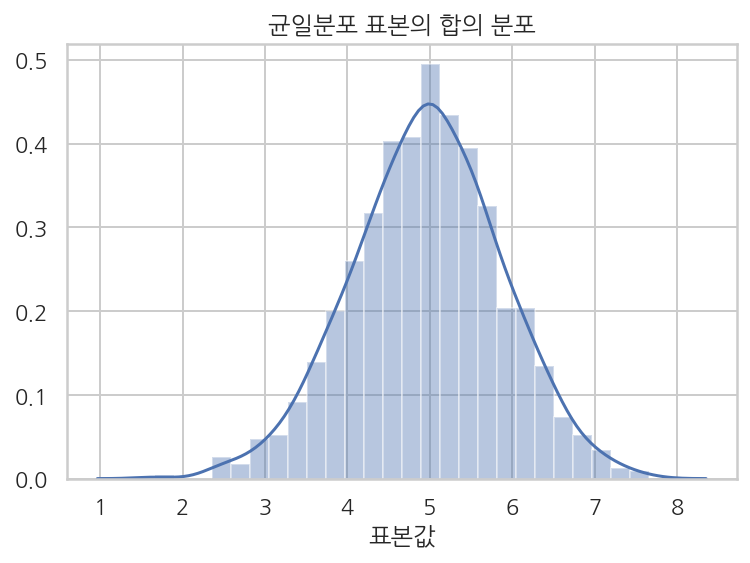

In [41]:
# 연습 문제 8.1.3
np.random.seed(0)
rv3 = sp.stats.uniform().rvs(size = (10, 1000))
s = rv3.sum(axis=0)

plt.figure(facecolor="1.")
sns.distplot(s)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")

plt.show()